In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
iris = datasets.load_iris()

In [47]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),#n_components=2)),
    ("classifier", GaussianNB())
])

In [48]:
pipeline.fit(iris.data, iris.target)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('classifier', GaussianNB())])

In [49]:
pipeline.score(iris.data, iris.target)

0.94

In [50]:
labels = pipeline.predict(iris.data)

In [51]:
cm = confusion_matrix(iris.target, labels)
cm

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  5, 45]], dtype=int64)

In [52]:
transformed = pipeline["pca"].transform(iris.data)

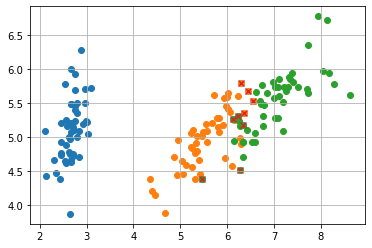

In [53]:
fig, axe = plt.subplots()
#DecisionBoundaryDisplay.from_estimator(pipeline, iris.data, ax=axe, eps=0.25, cm="jet")
for i in range(3):
    query = iris.target == i
    axe.scatter(transformed[query, 0], transformed[query, 1])
query = iris.target != labels
axe.scatter(transformed[query, 0], transformed[query, 1], marker="x")
axe.grid()